# EDA PREDICCIÓN DE LA DIABETES

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EXPLORACIÓN Y LIMPIEZA

In [2]:
total_data.shape

(768, 9)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
diabetes_data = total_data.drop(columns=['Pregnancies'])
diabetes_data.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,0,33.6,0.627,1
1,85,66,0,26.6,0.351,0
2,183,64,0,23.3,0.672,1
3,89,66,94,28.1,0.167,0
4,137,40,168,43.1,2.288,1


### ANÁLISIS UNIVARIANTE

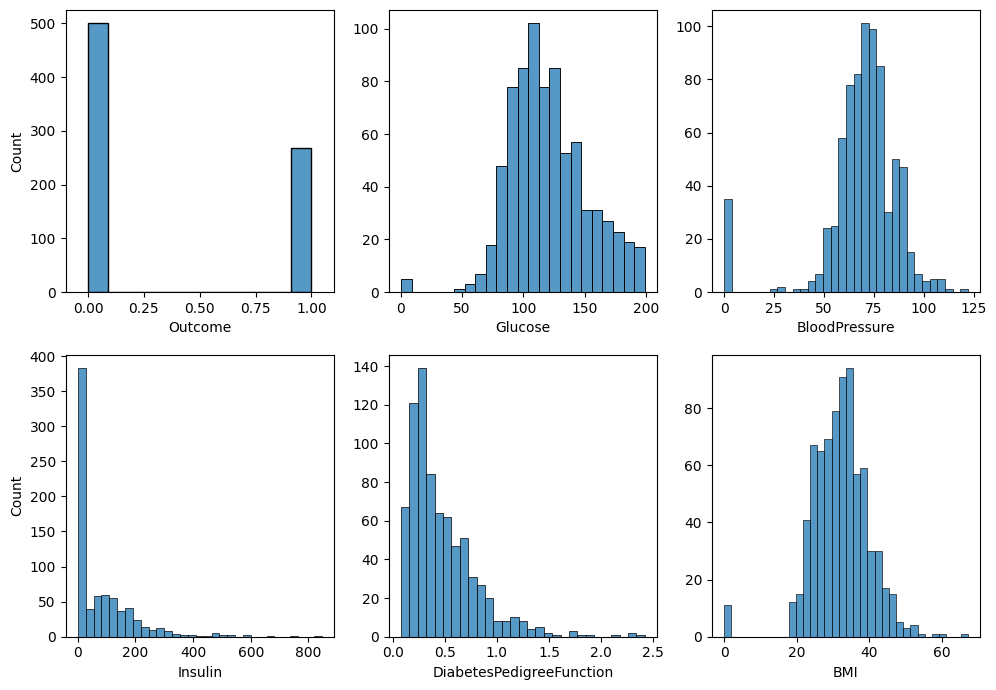

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Outcome").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Insulin")
sns.histplot(ax = axis[1, 1], data = total_data, x = "DiabetesPedigreeFunction").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "BMI").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### ANÁLISIS MULTIVARIANTE

ANÁLISIS NUMÉRICO - NUMÉRICO

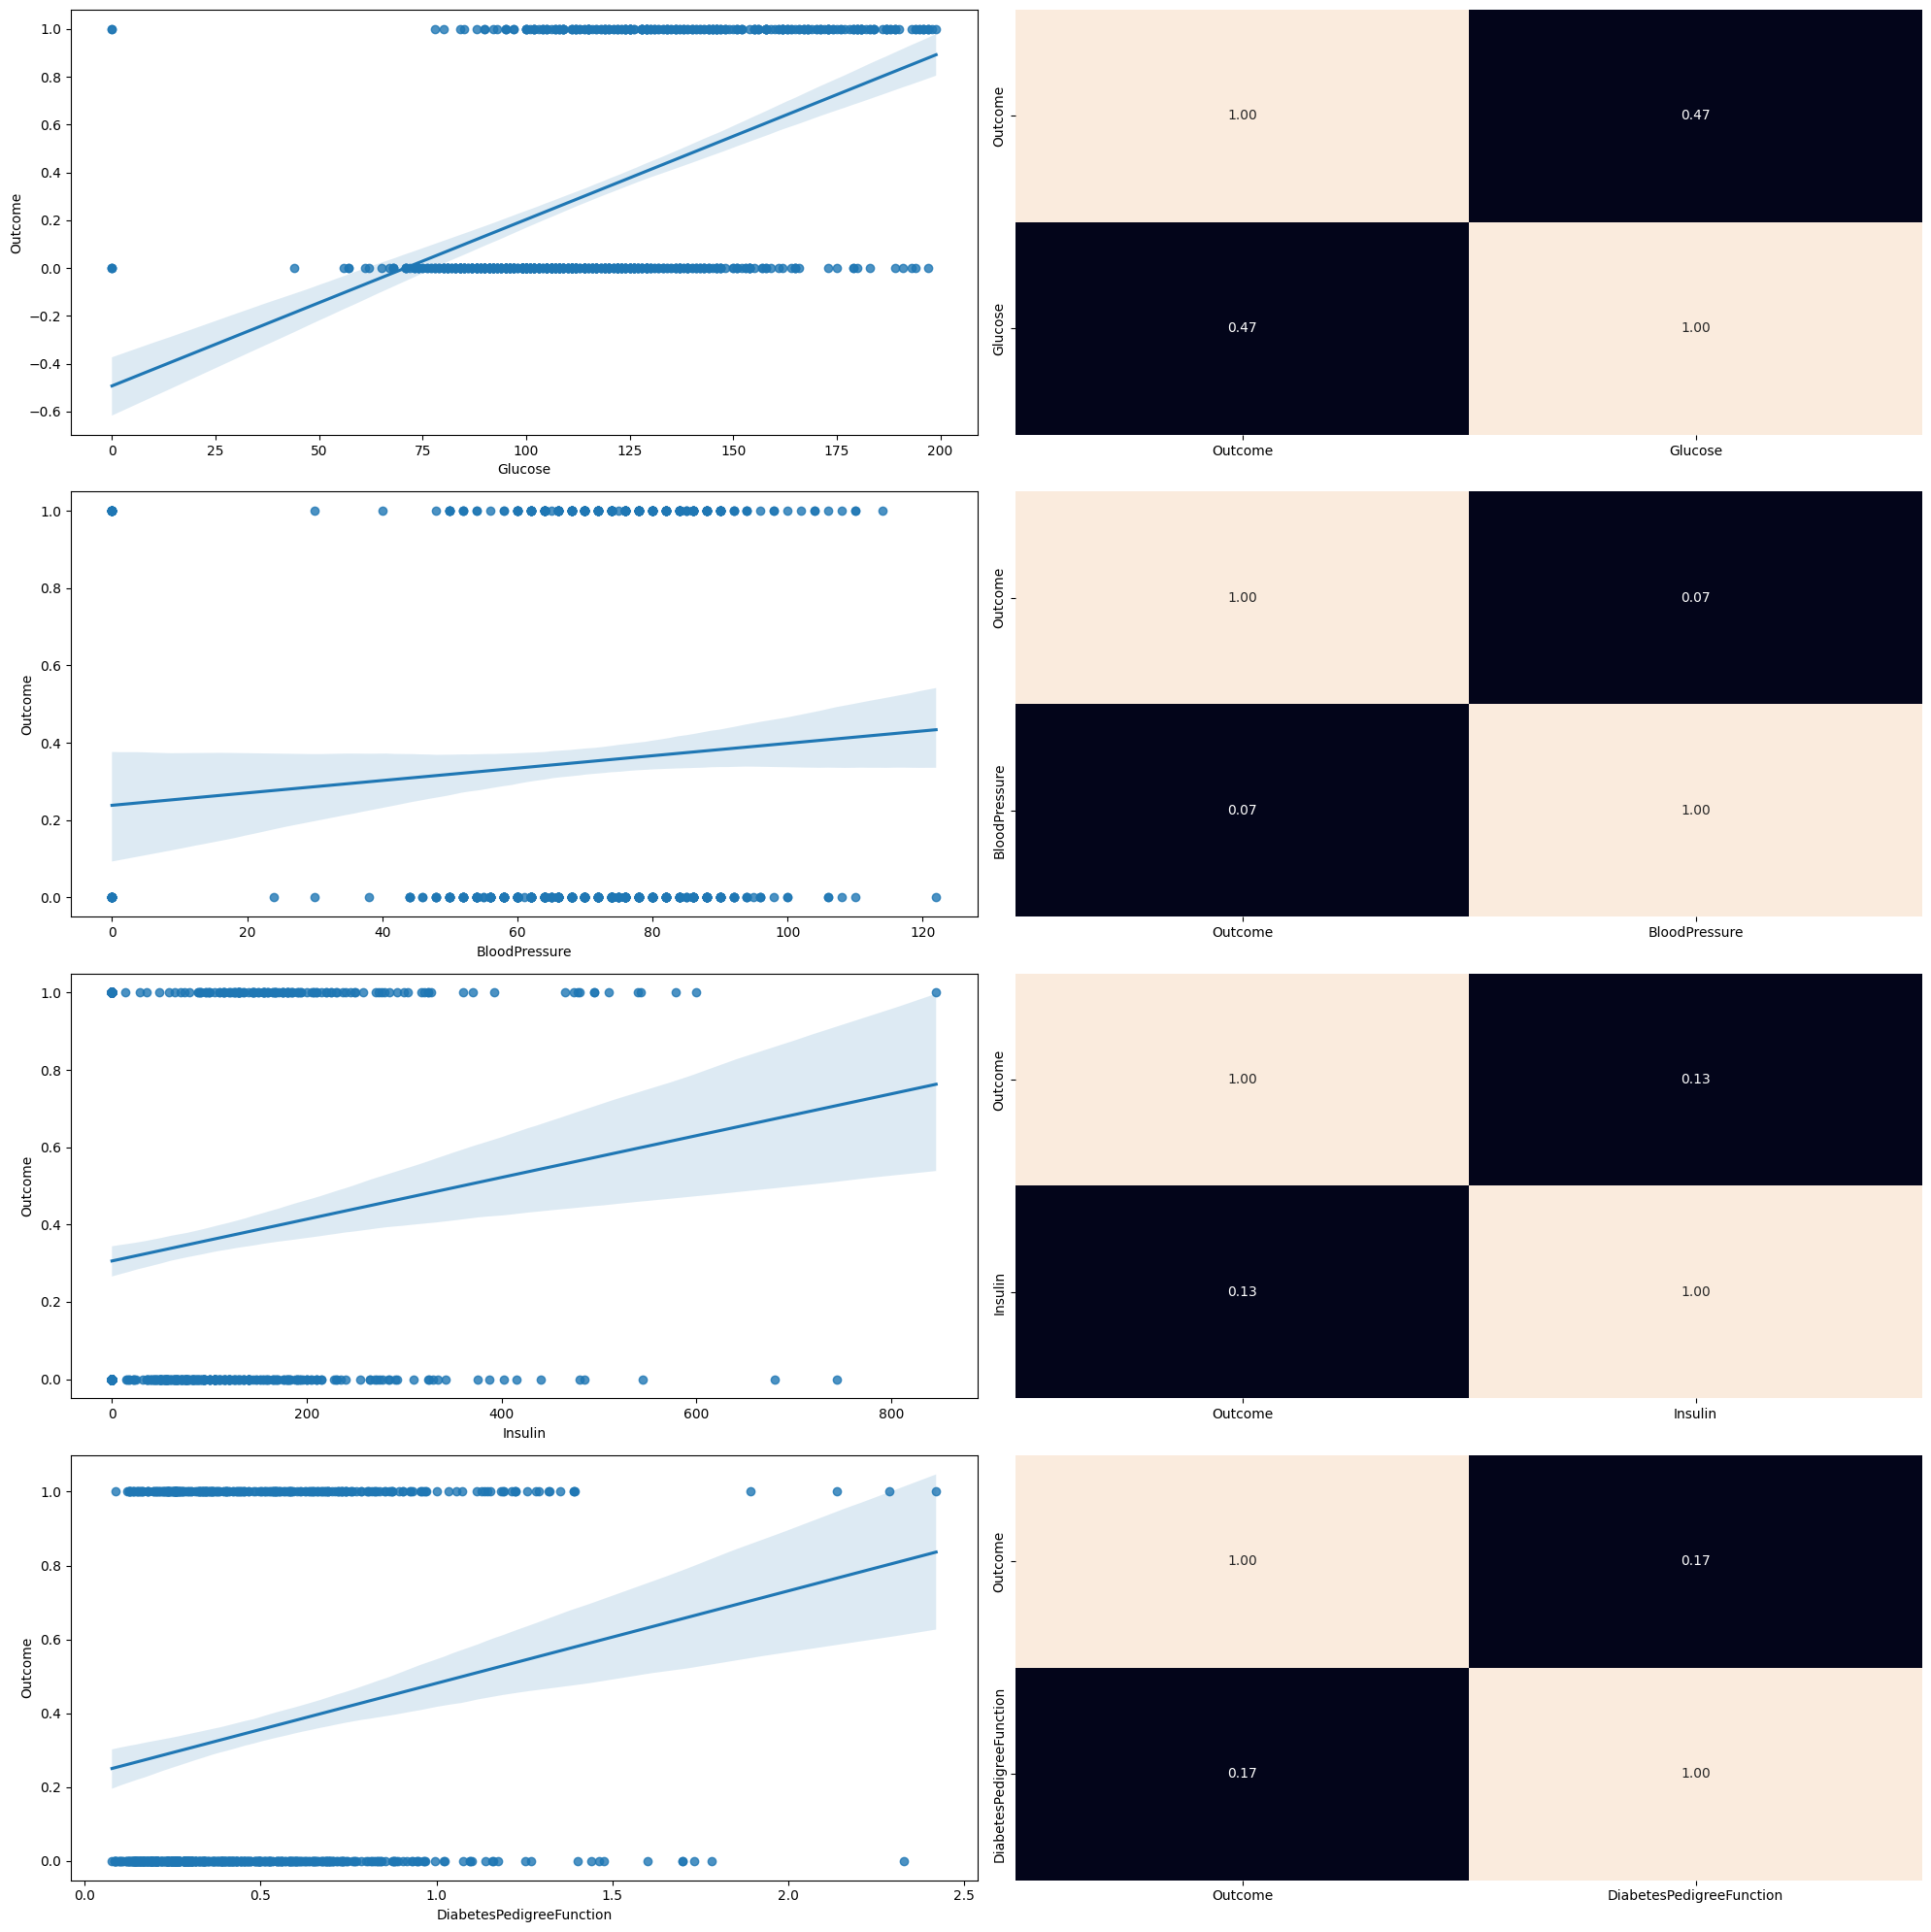

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, axis = plt.subplots(4, 2, figsize=(20, 20))

# Diagramas de dispersión y mapas de calor
sns.regplot(data=total_data, x="Glucose", y="Outcome", ax=axis[0, 0])
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(data=total_data, x="BloodPressure", y="Outcome", ax=axis[1, 0])
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=total_data, x="Insulin", y="Outcome", ax=axis[2, 0])
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(data=total_data, x="DiabetesPedigreeFunction", y="Outcome", ax=axis[3, 0])
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [19]:
for col in diabetes_data.columns:
    if diabetes_data[col].dtype == 'object': 
        diabetes_data[col], _ = pd.factorize(diabetes_data[col])  

print(diabetes_data.head())

   Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Outcome
0      148             72        0  33.6                     0.627        1
1       85             66        0  26.6                     0.351        0
2      183             64        0  23.3                     0.672        1
3       89             66       94  28.1                     0.167        0
4      137             40      168  43.1                     2.288        1


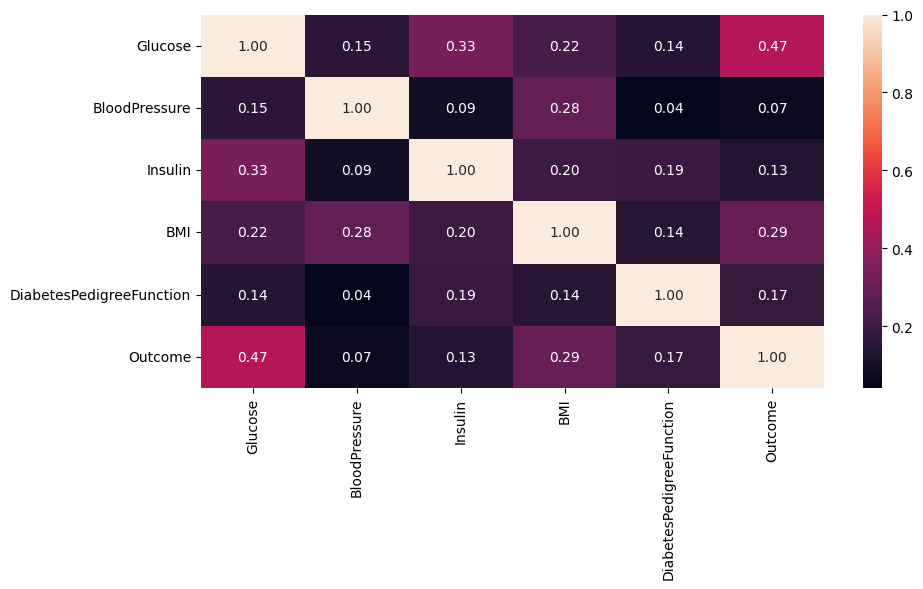

In [20]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

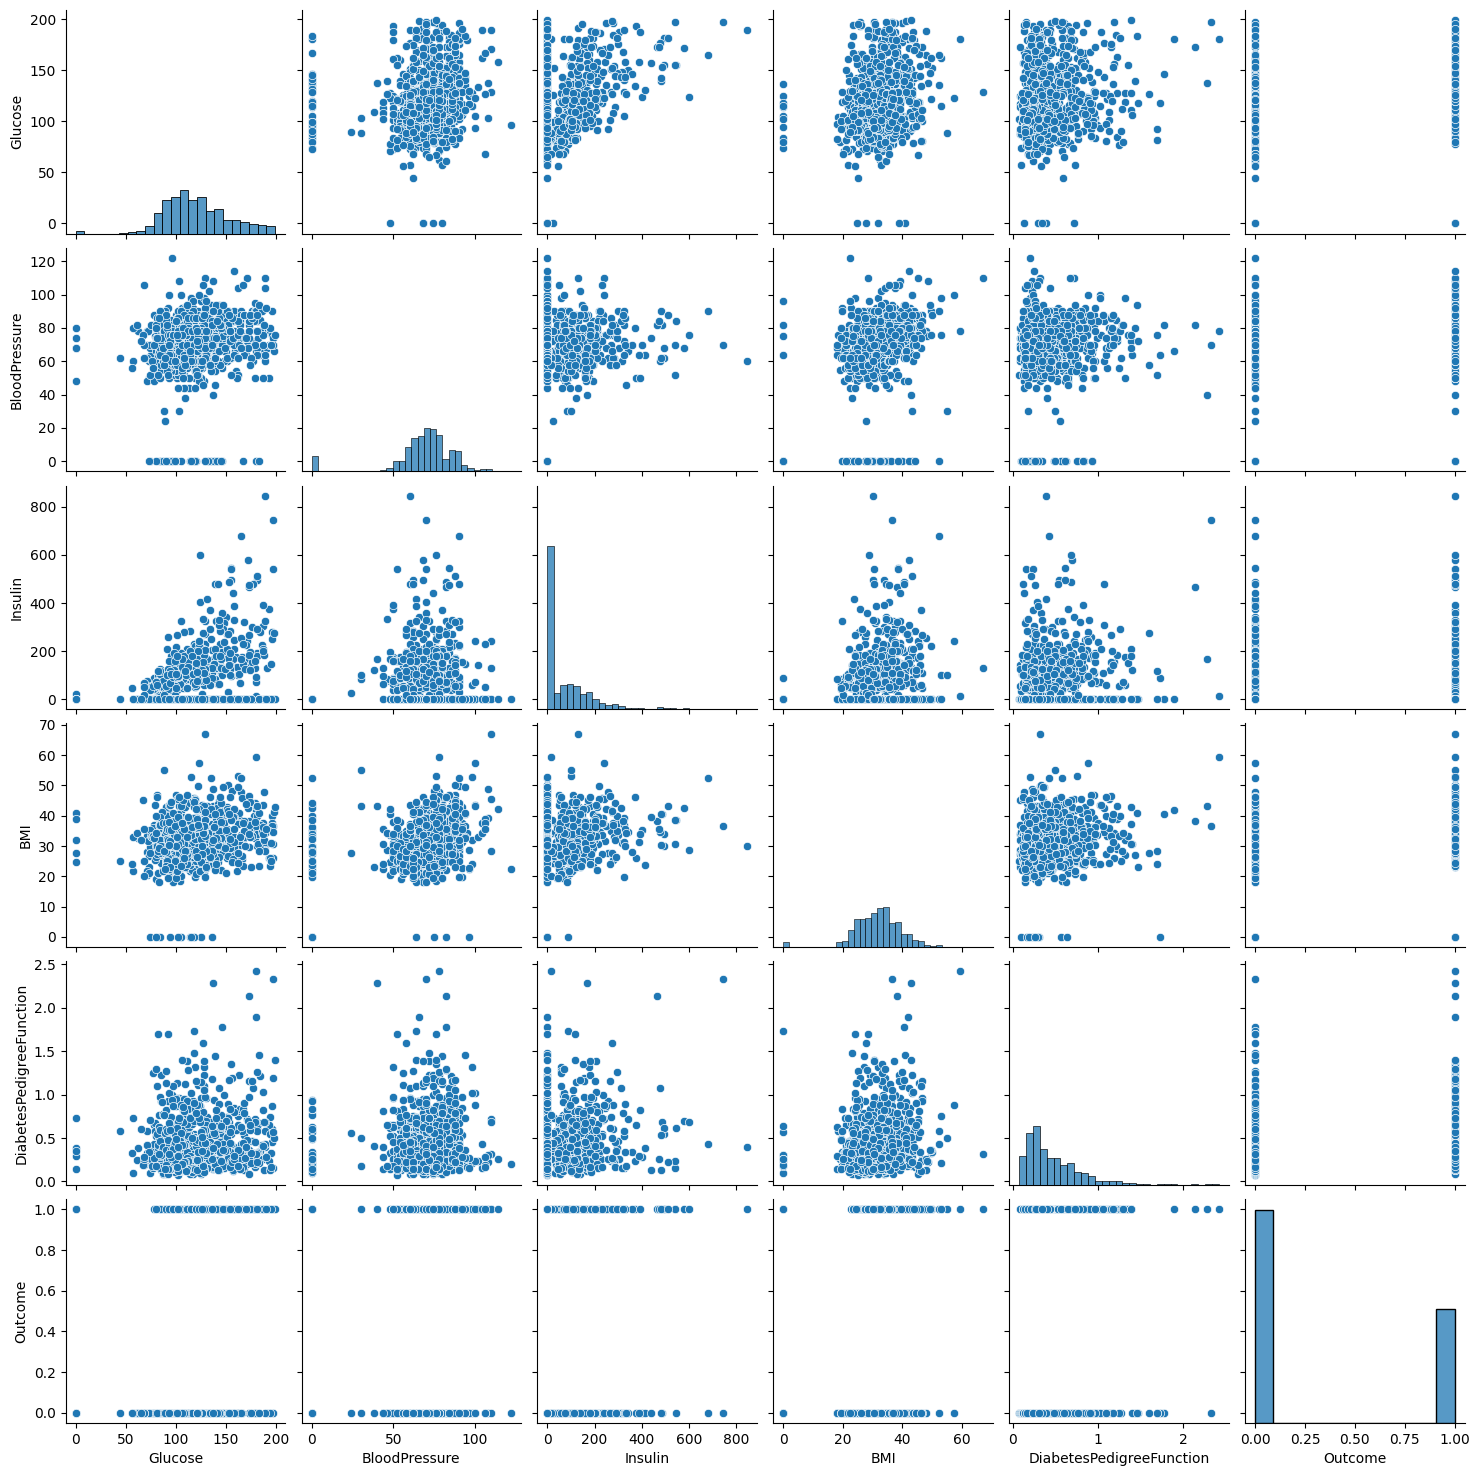

In [21]:
sns.pairplot(data = diabetes_data)

In [23]:
diabetes_data.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,1.000000


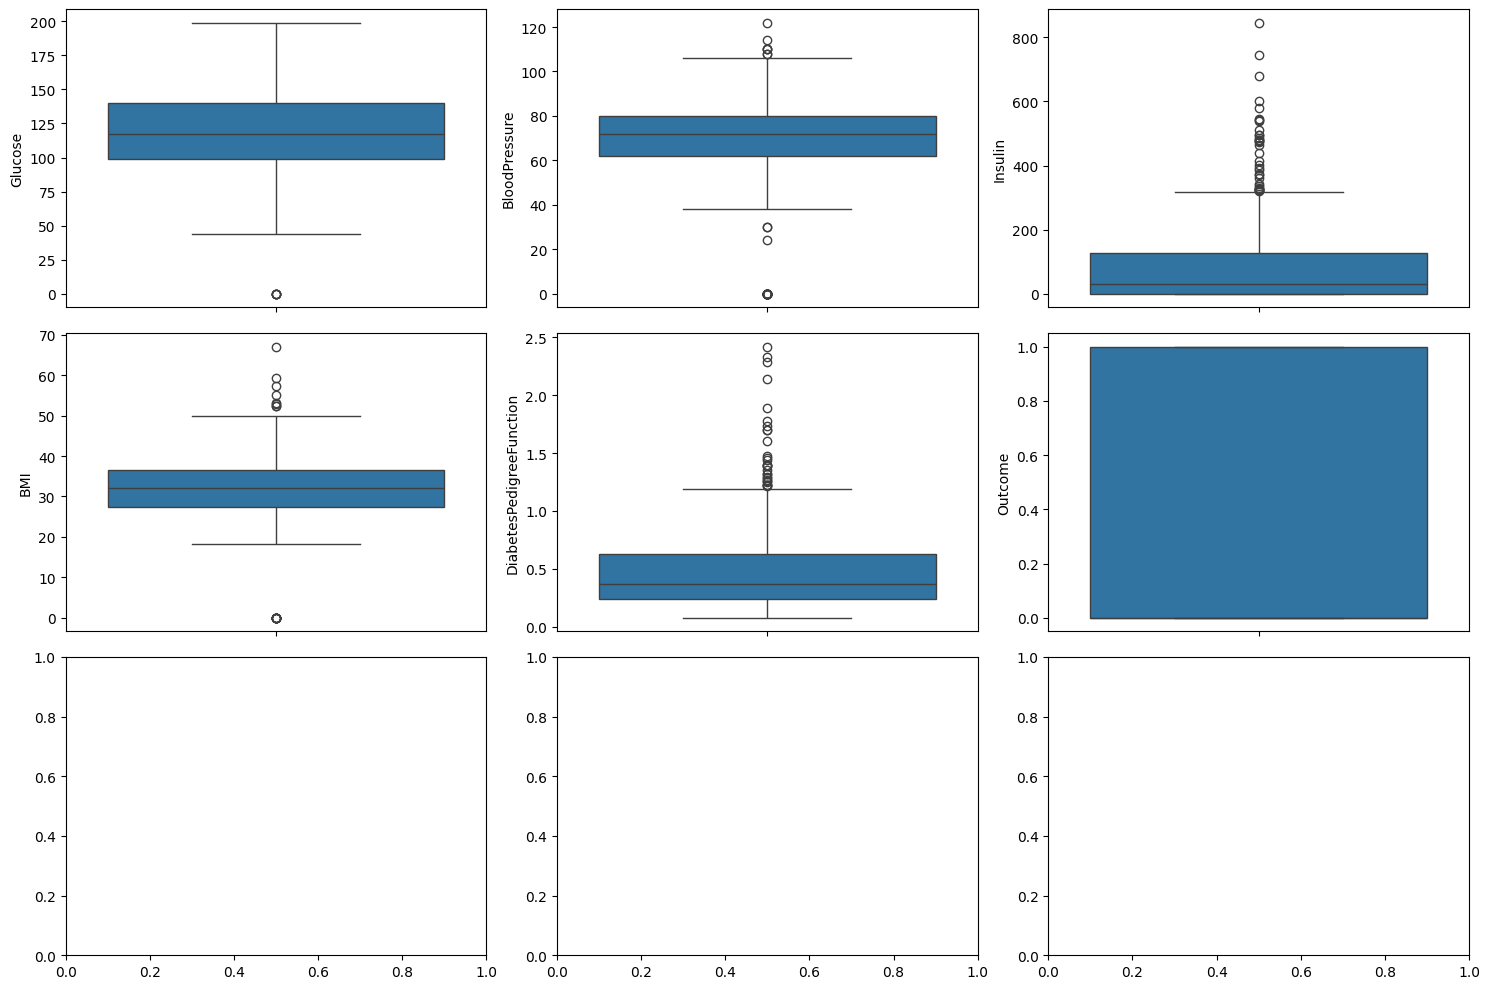

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Diagramas de caja
sns.boxplot(data=total_data, y="Glucose", ax=axis[0, 0])
sns.boxplot(data=total_data, y="BloodPressure", ax=axis[0, 1])
sns.boxplot(data=total_data, y="Insulin", ax=axis[0, 2])
sns.boxplot(data=total_data, y="BMI", ax=axis[1, 0])
sns.boxplot(data=total_data, y="DiabetesPedigreeFunction", ax=axis[1, 1])
sns.boxplot(data=total_data, y="Outcome", ax=axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [25]:
diabetes_data.isnull().sum()

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

### FEATURE SELECTION

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = diabetes_data.drop("Outcome", axis = 1)
y = diabetes_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=7 is greater than n_features=5. All the features will be returned.
  warnings.warn(


,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,84.0,0.0,0.0,0.0,0.304
1,112.0,82.0,0.0,28.2,1.282
2,139.0,46.0,83.0,28.7,0.654
3,161.0,50.0,0.0,21.9,0.254
4,134.0,80.0,370.0,46.2,0.238


In [28]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [29]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,84.0,0.0,0.0,0.0,0.304,0
1,112.0,82.0,0.0,28.2,1.282,1
2,139.0,46.0,83.0,28.7,0.654,0
3,161.0,50.0,0.0,21.9,0.254,0
4,134.0,80.0,370.0,46.2,0.238,1


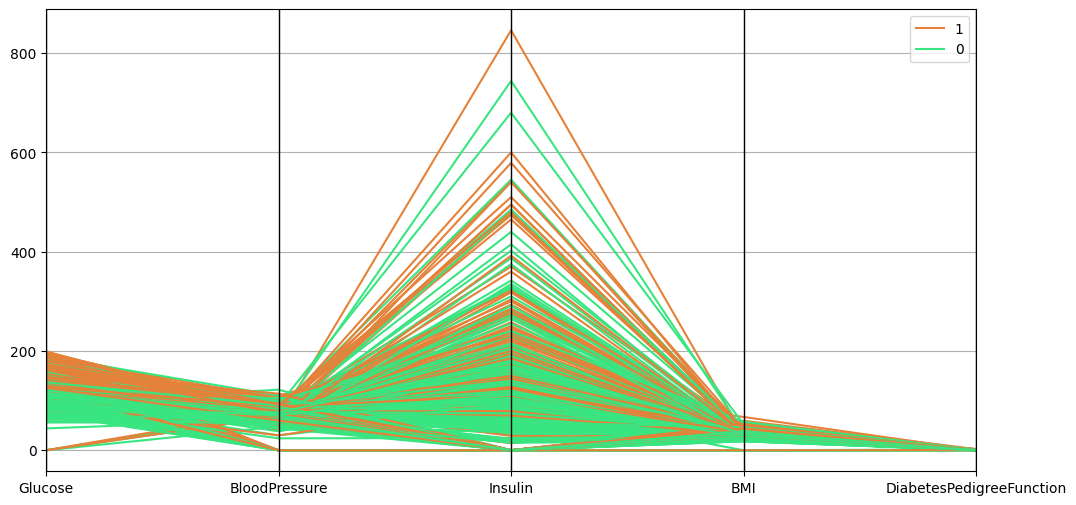

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(diabetes_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [31]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

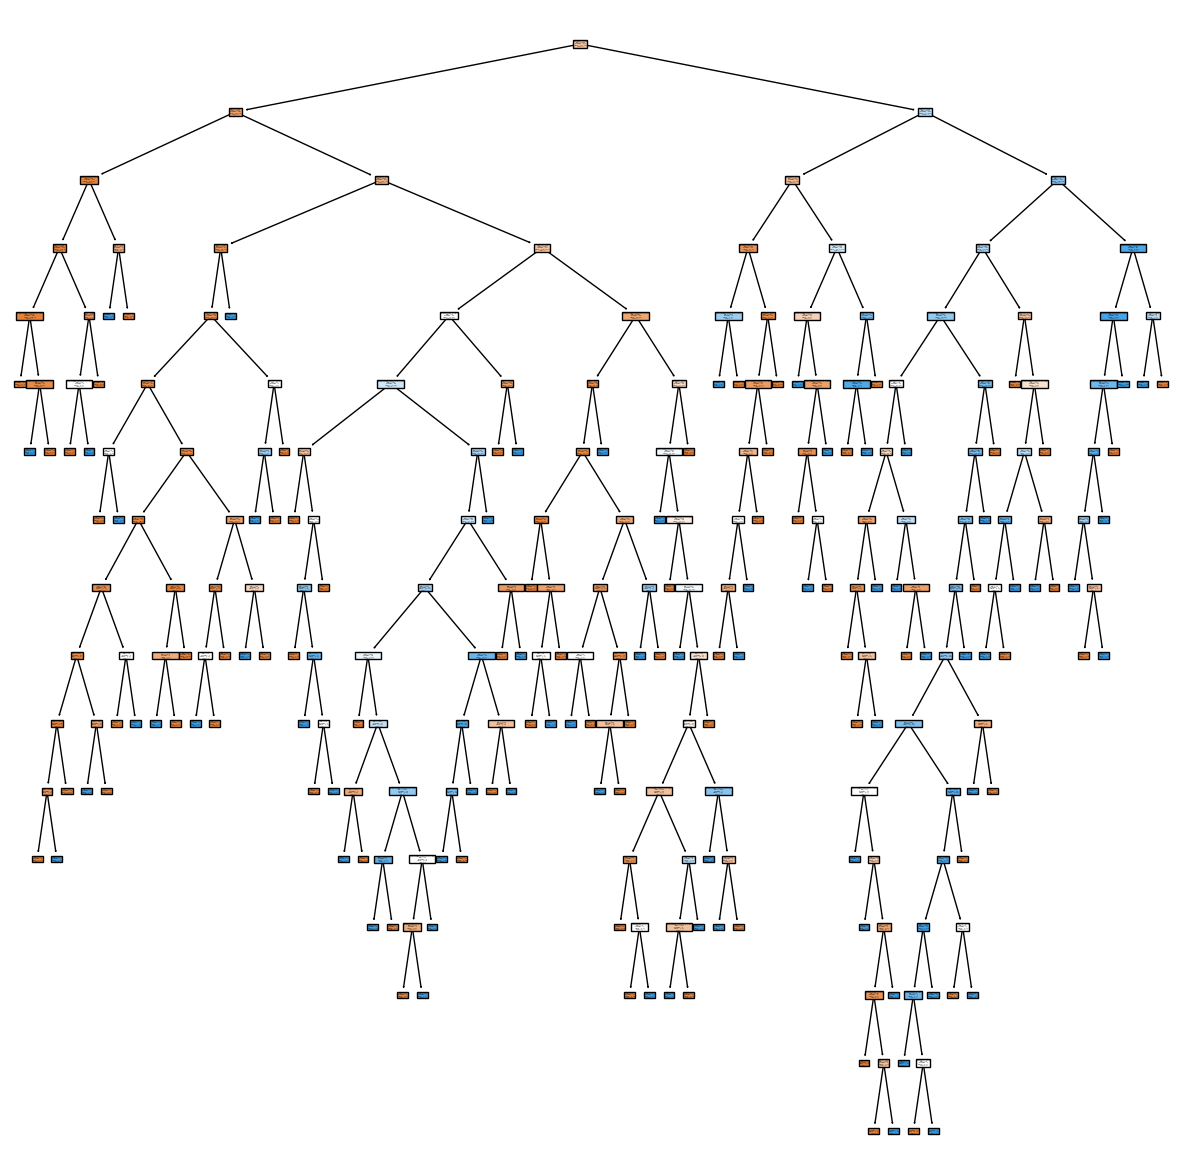

In [33]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6493506493506493

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [38]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403